In [1]:
import numpy as np

In [2]:
x = np.array([1,4,5,6])
fx = np.array([0, 1.386294,1.609438, 1.791759])

In [3]:
def lagrange_inter(x, fx, val):
    l = 0
    for j in range(len(x)):
        k = x[j]
        s = 1
        for i in range(len(x)):
            if i == j:
                continue
            s = s *((val - x[i])/(k-x[i]))
        l = l + s*fx[j]
    return l

In [4]:
k = np.linspace(1,6,25)
arr = []
for i in k:
    n = lagrange_inter(x, fx,i )
    arr.append(n)
print(arr)

[0.0, 0.1483591217447915, 0.2871800121527779, 0.41688939648437484, 0.5379140000000002, 0.6506805479600697, 0.7556157656250007, 0.8531463782552082, 0.9436991111111114, 1.027700689453125, 1.105577838541667, 1.1777572836371526, 1.2446657500000002, 1.306729962890625, 1.3643766475694445, 1.4180325292968747, 1.4681243333333338, 1.515078784939236, 1.559322609375, 1.6012825319010415, 1.6413852777777778, 1.6800575722656252, 1.717726140625, 1.7548177081163197, 1.791759]


In [5]:
import matplotlib.pyplot as plt

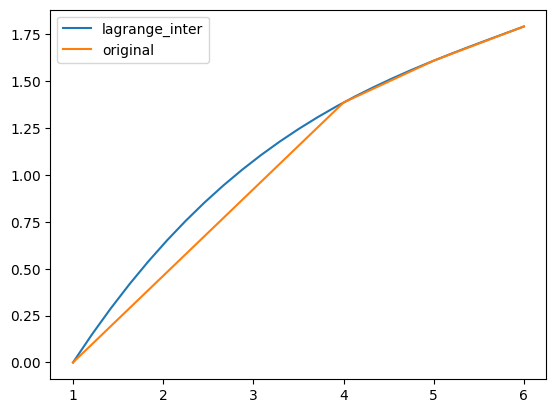

In [6]:
plt.plot(k, arr, label = 'lagrange_inter')
plt.plot(x,fx, label = 'original')
plt.legend()
plt.show()

In [7]:
def sum_arr(arr):
    s = 0
    for i in arr:
        s = s+ i
    return s
# def newton_inter(x,fx, val):
#     a = []
#     n = len(fx)
#     fx_1 = fx.copy()
#     for i in range(n-1):
#         s = np.zeros(n-i-1)
#         # print(s)
#         for j in range(0, len(fx_1)-i-1):
#             s[j] = (fx_1[j+1] - fx_1[j])/(x[j+i+1] - x[j])
#             if j+1 == len(fx_1):
#                 break
#         a.append(s[0])
#         # print(s)
#         fx_1 = s.copy()
#     k = fx[0]
#     kel = []
#     kel.append(k)
    
#     for j in range(n-1):
#         let = 1
#         for i in range(1,len(a)-j):
#             let = let * (val * x[i])
#         kel.append(let*a[n-2-j])
#     return sum(kel)
def divided_diff(x, y):
    n = len(x)
    F = [[0] * n for _ in range(n)]
    for i in range(n):
        F[i][0] = y[i]

    for j in range(1, n):
        for i in range(n - j):
            F[i][j] = (F[i + 1][j - 1] - F[i][j - 1]) / (x[i + j] - x[i])

    return F

def newton_interpolation(x, y, xi):
    F = divided_diff(x, y)
    n = len(x)
    result = F[0][0]
    for i in range(1, n):
        term = F[0][i]
        for j in range(i):
            term *= (xi - x[j])
        result += term
    return result

In [8]:
newton_interpolation(x, fx, 2)

0.6287674000000001

In [9]:
# k = np.linspace(1,6, 100)
arr1 = []
for i in k:
    n = newton_interpolation(x, fx,i )
    arr1.append(n)
arr1

[0.0,
 0.14835912174479163,
 0.28718001215277783,
 0.416889396484375,
 0.5379140000000001,
 0.6506805479600697,
 0.755615765625,
 0.8531463782552083,
 0.9436991111111112,
 1.0277006894531249,
 1.1055778385416666,
 1.1777572836371528,
 1.2446657499999998,
 1.306729962890625,
 1.364376647569444,
 1.4180325292968747,
 1.4681243333333334,
 1.515078784939236,
 1.559322609375,
 1.6012825319010418,
 1.6413852777777775,
 1.6800575722656252,
 1.7177261406249997,
 1.7548177081163194,
 1.791759]

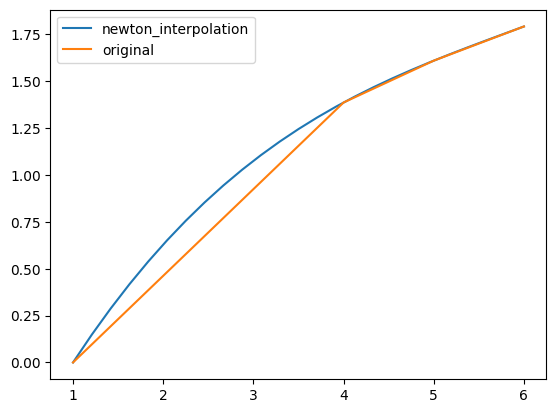

In [10]:
plt.plot(k, arr1, label = 'newton_interpolation')
plt.plot(x,fx, label = 'original')
plt.legend()
plt.show()

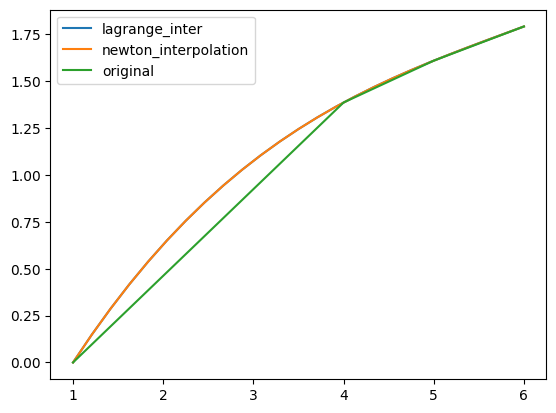

In [11]:
plt.plot(k, arr, label = 'lagrange_inter')
plt.plot(k, arr1, label = 'newton_interpolation')
plt.plot(x,fx, label = 'original')
plt.legend()
plt.show()